In [1]:
import os 
os.chdir("marl/")
os.getcwd()

'c:\\users\\beomj\\src\\archived_codes\\archived\\2_predator_prey_ma_gym_marl\\marl'

In [2]:
import gym
import ma_gym
import matplotlib.pyplot as plt 
from IPython import display
import time 
from agents.DqnAgent import DqnAgent
import numpy as np
from tqdm.auto import tqdm
import time 

In [3]:
env = gym.make('PredatorPrey7x7-v0')
agents = [DqnAgent(index=i, nS=28, nA=5, alpha=0.001, gamma=0.05, eps=1, eps_min=0.03, eps_decay=0.999, max_mem=500) for i in range(env.n_agents)]

C:\Users\beomj\anaconda3\envs\test2\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [4]:
rewards = [] #Store rewards for graphing
epsilons = [] # Store the Explore/Exploit 
total_time=150
BATCHSIZE=16
EPISODES=10
nS=28
start = time.time()

for e in range(EPISODES):
    state = env.reset()
    state = np.array(state)
    tot_rewards = [0 for i in range(env.n_agents)]

    for time_ in range(total_time): 
        actions = [agent.action(state[i,:]) for i, agent in enumerate(agents)]
        nstate, reward, done, info = env.step(actions)
        nstate = np.array(nstate)
        for i, agent in enumerate(agents):
            agent.store(state[i,:], actions[i], reward[i], nstate[i,:], done[i]) 
        state = nstate
        for i in range(env.n_agents):
            tot_rewards[i] += reward[i]
        if all(done) or time_ == total_time-1:
            rewards.append(tot_rewards)
            epsilons.append(agents[0].eps)
            print("episode: {}/{}, score: {:7.3f}, e: {:7.3f} time :{:3d}"
                  .format(e, EPISODES, np.mean(tot_rewards), agents[0].eps, time_))
            # print(time_, total_time, done)
            break
        #Experience Replay
        for agent in agents:
            if len(agent.buffer) > BATCHSIZE:
                agent.experience_replay(BATCHSIZE)
        
print(time.time()-start)

episode: 0/10, score:  -1.500, e:   0.920 time : 99
episode: 1/10, score:   3.100, e:   0.842 time : 89
episode: 2/10, score: -21.500, e:   0.763 time : 99
episode: 3/10, score:  -2.000, e:   0.691 time : 99
episode: 4/10, score:  -9.500, e:   0.625 time : 99
episode: 5/10, score:  -0.830, e:   0.576 time : 82
episode: 6/10, score:  -0.500, e:   0.522 time : 99
episode: 7/10, score:  -4.000, e:   0.473 time : 99
episode: 8/10, score:  -5.500, e:   0.428 time : 99
episode: 9/10, score: -12.000, e:   0.388 time : 99
11.011373281478882


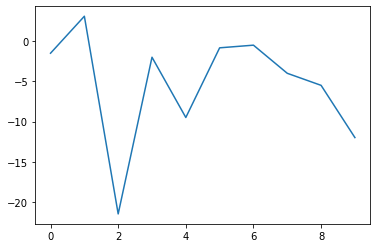

In [5]:
mean = np.mean(rewards, axis=1)
plt.plot(mean)

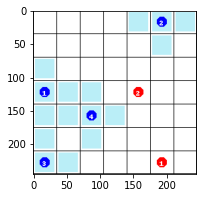

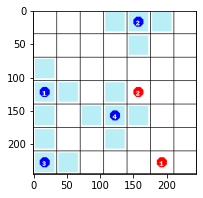

In [7]:
plt.figure(figsize=(4, 3))
display.clear_output(wait=True)

for e in range(1):
    state = env.reset()
    state = np.array(state)
    for time in range(10): 
        actions = [agent.action(state[i,:]) for i, agent in enumerate(agents)]
        nstate, reward, done, info = env.step(actions)
        nstate = np.array(nstate)
        state = nstate

        if all(done) or time == total_time-1:
            break

        display.clear_output(wait=True) 
        display.display(plt.gcf())
        plt.imshow(env.render('rgb_array'))


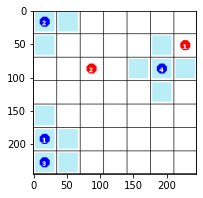

In [58]:
import imageio

fig, ax = plt.subplots(figsize=(4, 3))

def animate(k):
    global state
    state = np.array(state)
    actions = [agent.action(state[i,:]) for i, agent in enumerate(agents)]
    nstate, reward, done, info = env.step(actions)
    nstate = np.array(nstate)
    state = nstate
    
    _ = ax.imshow(env.render('rgb_array'))
    _ = fig.canvas.draw()       # draw the canvas, cache the renderer
    im = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    im  = im.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return im

state = env.reset()
imageio.mimsave('../predator_prey1.gif', [animate(i) for i in range(20)],fps=4)